Import các thư viện hỗ trợ quá trình xử lý dữ liệu

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import statsmodels.api as sm

## Chuẩn bị dữ liệu : vì doanh thu được chia thành 12file cho mỗi tháng nên ta phải gộp lại để tiến hành các bước tiếp theo

In [ ]:
path = 'c:/Users/Long/OneDrive/Documents/D-A/Python/Project_python/'
frames = []
all_length = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        pathfile = os.path.join(path, file)
        df = pd.read_csv(pathfile)
        frames.append(df)
        result = pd.concat(frames)
        leng_1month = len(df.index)

result.to_csv('new_table_sale_2019', index=False)
pd.DataFrame(result)

## 1. Đọc file

In [193]:
df = pd.read_csv('new_table_sale_2019')
pd.DataFrame(df)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Xem xét các kiểu dữ liệu của các cột

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## 2. Vẽ biều đồ doanh thu của tất cả các thành phố theo tháng

Tách tháng ra từ cột (Order Date) và gán các giá trị được trả về vào cột mới (Month)

In [195]:
df['Month'] = df['Order Date'].str[:2]
# In kết quả ra để kiểm tra
print(set(df['Month']))
# Xóa các hàng chứa giá trị nan
df = df.dropna(how='all')
# Xóa các  hàng chứa giá trị 'Or'
df = df[df['Month'] != 'Or']   

{'10', '07', '02', 'Or', '03', '06', '05', '09', '08', '11', '12', '04', nan, '01'}


Chuẩn hóa kiểu dữ liệu của cột (Quantity Ordered) (Price Each)

In [196]:
# Chuyển cột (Quantity Ordered) về kiểu integer
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
# Chuyển cột (Price Each) về kiểu float
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')
# Tạo cột sales từ cột (Quantity Ordered) và (Price Each)
df['sales'] = df['Quantity Ordered']*df['Price Each']
# Sắp xếp lại vị trí các cột
df = df.reindex(columns=['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'sales', 'Month', 'Order Date', 'Purchase Address'])
pd.DataFrame(df)

,Order ID,Product,Quantity Ordered,Price Each,sales,Month,Order Date,Purchase Address
0,141234,iPhone,1,700.000000,700.000000,01,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.990000,23.980000,01,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.990005,149.990005,01,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.990000,11.990000,01,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,8.970000,09,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.000000,700.000000,09,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.000000,700.000000,09,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.989990,379.989990,09,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Vẽ biểu đồ doanh thu của các tháng trong năm

<function matplotlib.pyplot.show(close=None, block=None)>

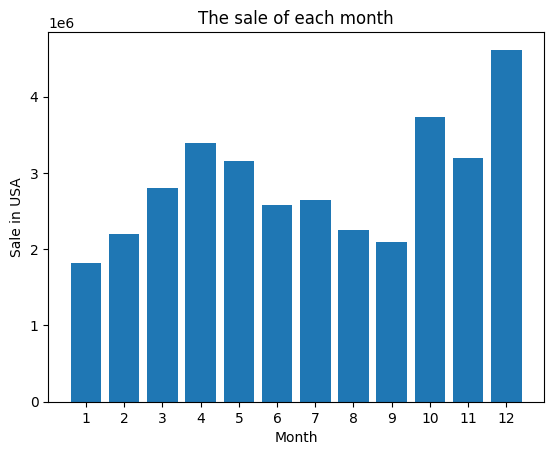

In [197]:
#Tính tổng doanh thu của các tháng 
sales_value = df.groupby('Month').sum()['sales']

months = range(1,13)
# Biểu dồ :
plt.bar(x=months, height=sales_value)
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sale in USA')
plt.title('The sale of each month')
plt.show


## 3. Vẽ biểu đồ doanh thu theo từng thành phố

In [198]:
# Tính tổng doanh thu của các thành phố
x3 = []
for x in df['Purchase Address']:
    x1 = x.split(',')
    x2 = x1[1].strip()
    x3.append(x2)
df['City'] = x3
sales_value_city = df.groupby('City').sum()['sales']
print(sales_value_city)
# In ra thành phố có doanh thu lớn nhất
print(sales_value_city.max())

City
Atlanta          2795498.50
Austin           1819581.75
Boston           3661642.00
Dallas           2767975.50
Los Angeles      5452571.00
New York City    4664317.50
Portland         2320490.50
San Francisco    8262204.00
Seattle          2747755.50
Name: sales, dtype: float32
8262204.0


['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City', 'Portland', 'San Francisco', 'Seattle']


<function matplotlib.pyplot.show(close=None, block=None)>

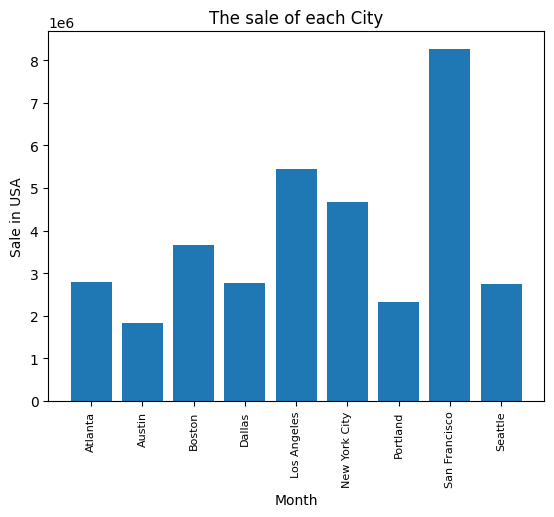

In [199]:
#Tạo list chứa tên các thành phố 
Cities = sales_value_city.index.tolist()
print(Cities)
# Vẽ biểu đồ :
plt.bar(x=Cities, height=sales_value_city)
plt.xticks(Cities, rotation = 90, size= 8)
plt.xlabel('Month')
plt.ylabel('Sale in USA')
plt.title('The sale of each City')
plt.show


In [200]:
# Chuyển kiểu dữ liệu của (Order Date) về date
df['Order Date'] = pd.to_datetime(df['Order Date'])
# Tạo cột mới chứa giờ order
df['Hours'] = df['Order Date'].dt.hour

C:\Users\Long\AppData\Local\Temp\ipykernel_2696\2188014825.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


## 4. Tìm hiểu các khung giờ mà lượng đặt hàng cao nhất theo từng thành phố

Text(0.5, 1.0, 'Số lượng đơn hàng của thành phố Seattle theo từng giờ')

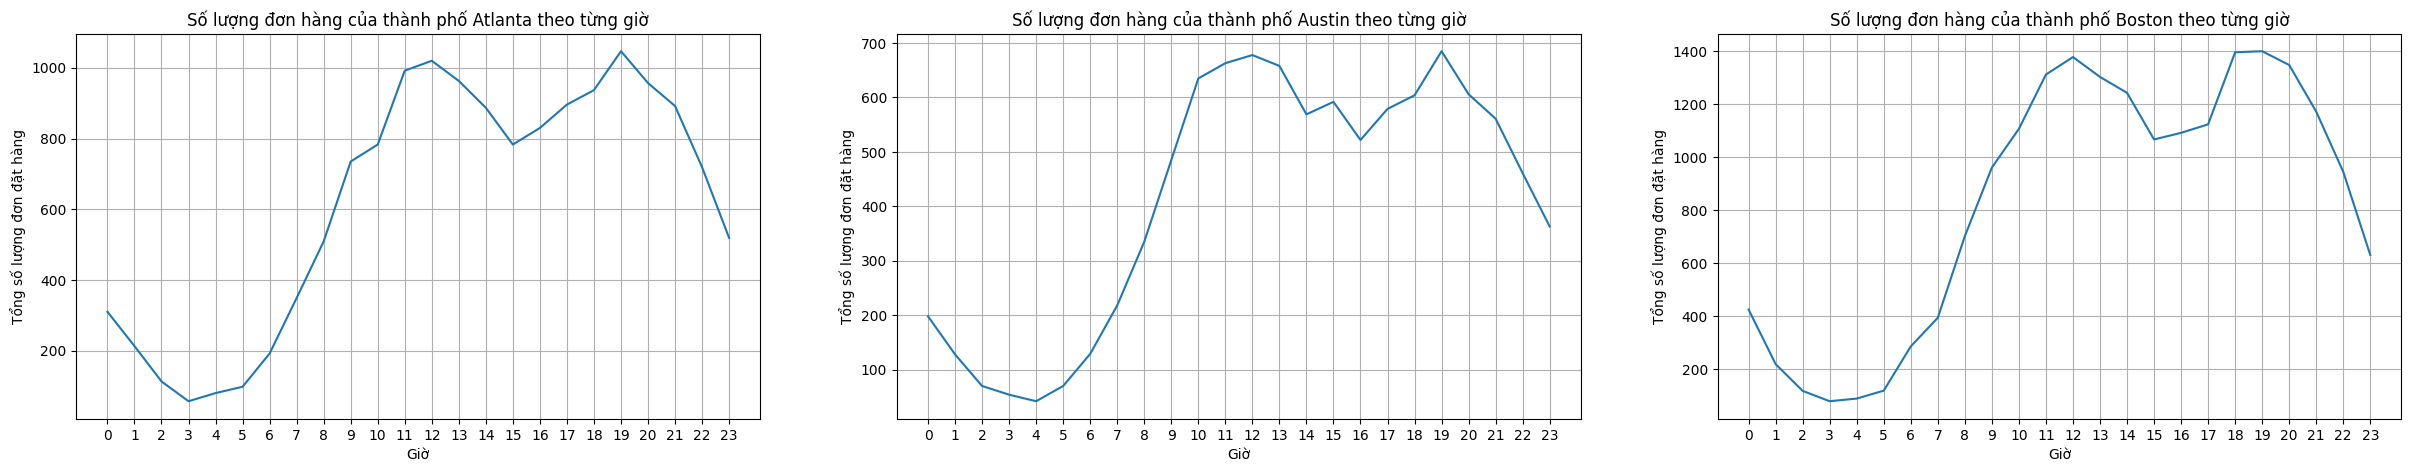

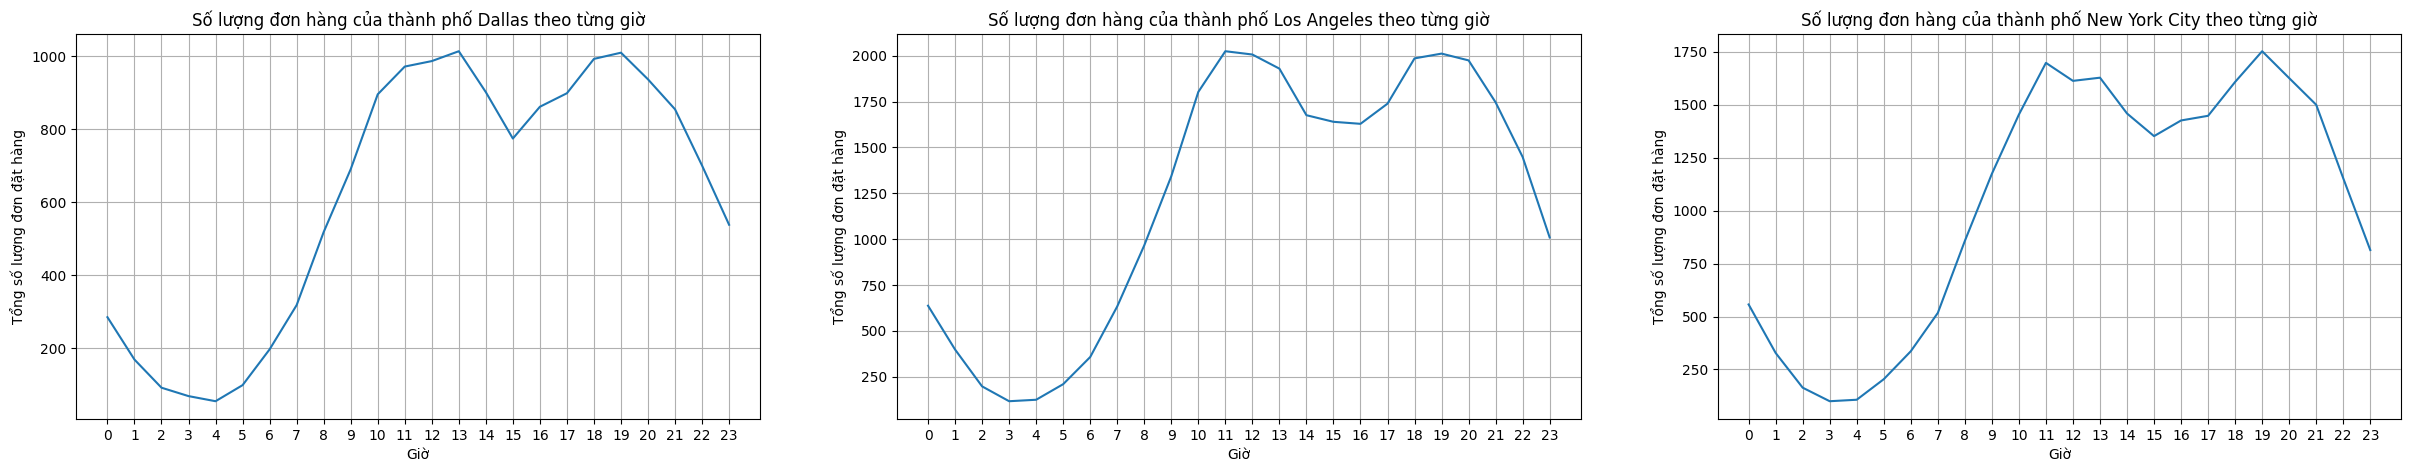

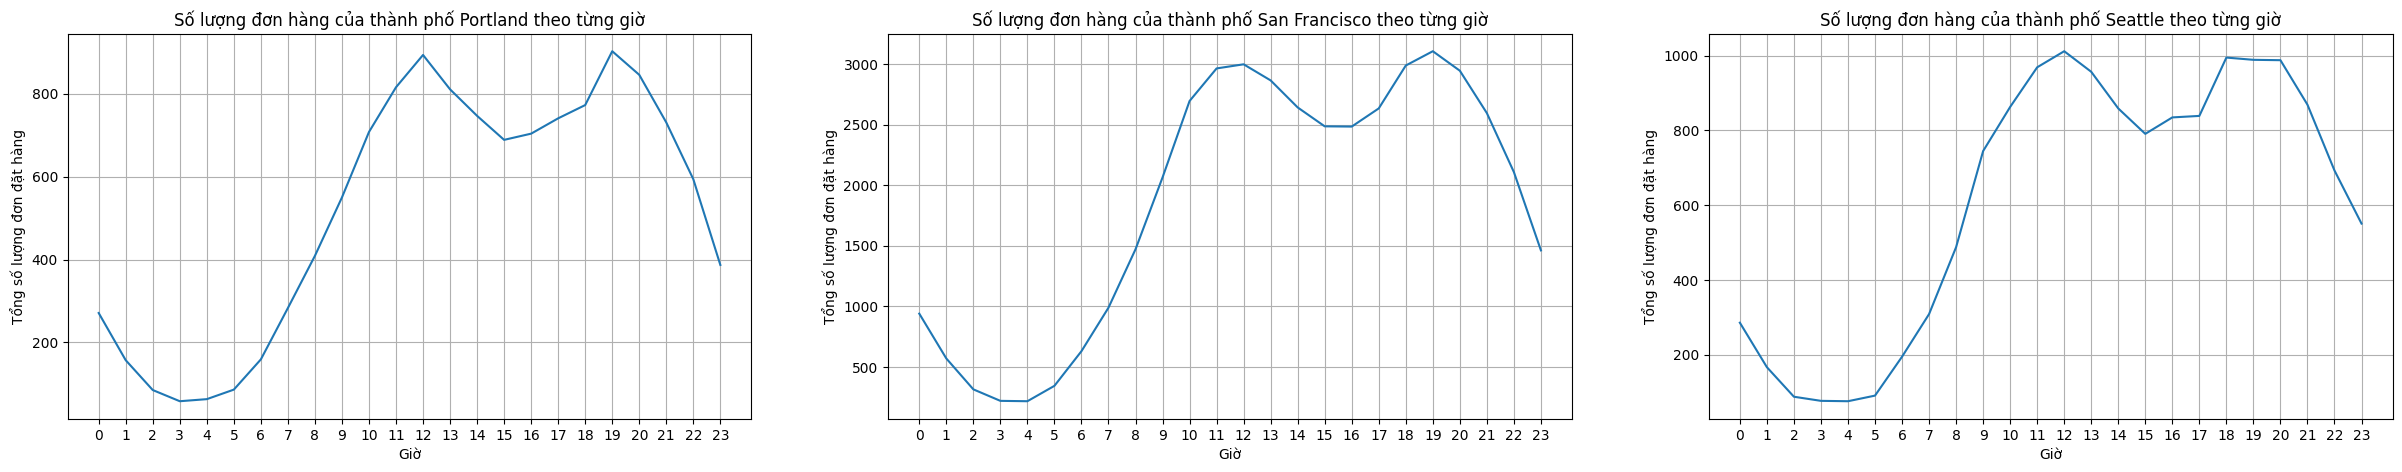

In [201]:
# Tạo biến chứa các thông tin theo thành phố
data_Atlanta = df[df['City']=='Atlanta']
data_Austin = df[df['City']=='Austin']
data_Boston = df[df['City']=='Boston']
data_Dallas = df[df['City']=='Dallas']
data_Los_Angeles = df[df['City']=='Los Angeles']
data_New_York_City = df[df['City']=='New York City']
data_Portland = df[df['City']=='Portland']
data_San_Francisco= df[df['City']=='San Francisco']
data_Seattle = df[df['City']=='Seattle']


sales_value_hours_Atlanta = data_Atlanta.groupby('Hours')['sales'].count()
sales_value_hours_Austin = data_Austin.groupby('Hours')['sales'].count()
sales_value_hours_Boston = data_Boston.groupby('Hours')['sales'].count()
sales_value_hours_Dallas = data_Dallas.groupby('Hours')['sales'].count()
sales_value_hours_Los_Angeles = data_Los_Angeles.groupby('Hours')['sales'].count()
sales_value_hours_New_York_City = data_New_York_City.groupby('Hours')['sales'].count()
sales_value_hours_Portland = data_Portland.groupby('Hours')['sales'].count()
sales_value_hours_San_Francisco = data_San_Francisco.groupby('Hours')['sales'].count()
sales_value_hours_Seattle = data_Seattle.groupby('Hours')['sales'].count()


Hours = sales_value_hours_Atlanta.index.tolist()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (30, 5))
ax1.plot(Hours, sales_value_hours_Atlanta)
ax1.grid()
ax1.set_xlabel('Giờ')
ax1.set_xticks(Hours)
ax1.set_ylabel('Tổng số lượng đơn đặt hàng')
ax1.set_title('Số lượng đơn hàng của thành phố Atlanta theo từng giờ')


ax2.plot(Hours, sales_value_hours_Austin)
ax2.grid()
ax2.set_xlabel('Giờ')
ax2.set_xticks(Hours)
ax2.set_ylabel('Tổng số lượng đơn đặt hàng')
ax2.set_title('Số lượng đơn hàng của thành phố Austin theo từng giờ')

ax3.plot(Hours, sales_value_hours_Boston)
ax3.grid()
ax3.set_xlabel('Giờ')
ax3.set_xticks(Hours)
ax3.set_ylabel('Tổng số lượng đơn đặt hàng')
ax3.set_title('Số lượng đơn hàng của thành phố Boston theo từng giờ')



fig, (ax4, ax5, ax6) = plt.subplots(1,3, figsize = (30, 5))
ax4.plot(Hours, sales_value_hours_Dallas)
ax4.grid()
ax4.set_xlabel('Giờ')
ax4.set_xticks(Hours)
ax4.set_ylabel('Tổng số lượng đơn đặt hàng')
ax4.set_title('Số lượng đơn hàng của thành phố Dallas theo từng giờ')


ax5.plot(Hours, sales_value_hours_Los_Angeles)
ax5.grid()
ax5.set_xlabel('Giờ')
ax5.set_xticks(Hours)
ax5.set_ylabel('Tổng số lượng đơn đặt hàng')
ax5.set_title('Số lượng đơn hàng của thành phố Los Angeles theo từng giờ')

ax6.plot(Hours, sales_value_hours_New_York_City)
ax6.grid()
ax6.set_xlabel('Giờ')
ax6.set_xticks(Hours)
ax6.set_ylabel('Tổng số lượng đơn đặt hàng')
ax6.set_title('Số lượng đơn hàng của thành phố New York City theo từng giờ')



fig, (ax7, ax8, ax9) = plt.subplots(1,3, figsize = (30, 5))
ax7.plot(Hours, sales_value_hours_Portland)
ax7.grid()
ax7.set_xlabel('Giờ')
ax7.set_xticks(Hours)
ax7.set_ylabel('Tổng số lượng đơn đặt hàng')
ax7.set_title('Số lượng đơn hàng của thành phố Portland theo từng giờ')


ax8.plot(Hours, sales_value_hours_San_Francisco)
ax8.grid()
ax8.set_xlabel('Giờ')
ax8.set_xticks(Hours)
ax8.set_ylabel('Tổng số lượng đơn đặt hàng')
ax8.set_title('Số lượng đơn hàng của thành phố San Francisco theo từng giờ')

ax9.plot(Hours, sales_value_hours_Seattle)
ax9.grid()
ax9.set_xlabel('Giờ')
ax9.set_xticks(Hours)
ax9.set_ylabel('Tổng số lượng đơn đặt hàng')
ax9.set_title('Số lượng đơn hàng của thành phố Seattle theo từng giờ')


Dựa vào biểu đồ ta có thể thấy là : từ khoảng 11h đến 12h và 18h và 19h là các khoảng thời gian mà lượng order là lớn nhất trong ngày, chúng ta có thể tiến hành triển khai chạy ads trước 1h hoặc 30p 2 khoảng thời gian này

## 5. Tổng số lượng đơn đặt hàng của tất cả các thành phố

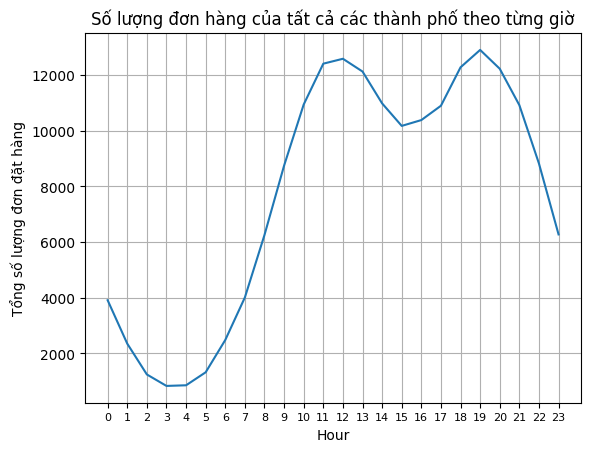

In [202]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hours'] = df['Order Date'].dt.hour
sales_value_hours = df.groupby('Hours').count()['sales']
Hours = sales_value_hours.index.tolist()
plt.plot(Hours, sales_value_hours)
plt.xticks(Hours, size = 8)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Tổng số lượng đơn đặt hàng')
plt.title('Số lượng đơn hàng của tất cả các thành phố theo từng giờ')
plt.show()

# 6. Tìm ra top 10 các nhóm sản phẩm thường được đặt hàng cùng nhau

In [203]:
# Tách các đơn đặt hàng cùng nhau bằng cách lọc ra các đơn hàng xuất hiện nhiều hơn 1 lần
df_dup = df[df['Order ID'].duplicated(keep=False)]
# Định nghĩa hàm lamda thực hiện nối các product thành một chuỗi duy nhất và cách nhay bằng dấu phẩy
group_product = lambda product: ','.join(product)
# Nhóm các đơn hàng có (orderid) giống nhau sau đó gom lại theo product và thực thi transform theo group_product đã được khai báo từ trước
df_dup['all_product'] = df_dup.groupby('Order ID')['Product'].transform(group_product)
# Xóa các hàng có giá trị 'Order ID', 'all_product' lặp lại 
df_dup = df_dup[['Order ID', 'all_product']].drop_duplicates()
pd.DataFrame(df_dup)

C:\Users\Long\AppData\Local\Temp\ipykernel_2696\1436572896.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['all_product'] = df_dup.groupby('Order ID')['Product'].transform(group_product)


,Order ID,all_product
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


Tìm kiếm 10 nhóm sản phẩm được bán chạy nhất

In [204]:
df_dup['all_product'].value_counts().head(10)

all_product
iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     77
Vareebadd Phone,Bose SoundSport Headphones             60
Name: count, dtype: int64

## 7. Sản phẩm nào được bán chạy nhất và mối liên hệ giữa giá và lượt mua

C:\Users\Long\AppData\Local\Temp\ipykernel_2696\887364962.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_ls, rotation=90, size=8)


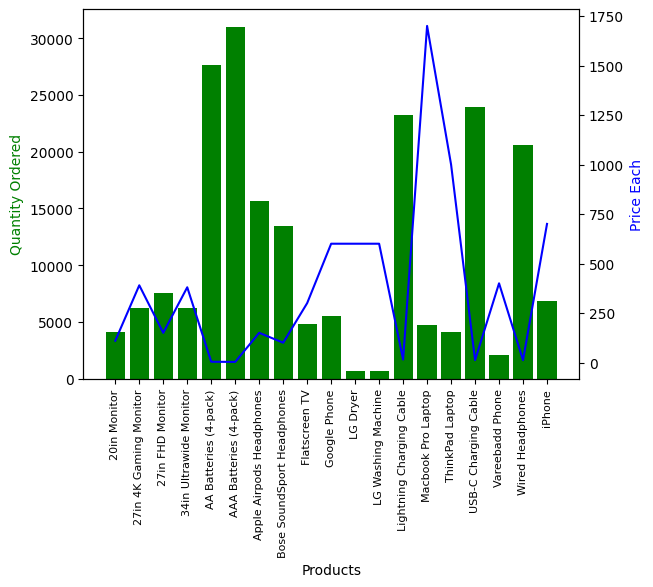

In [205]:
# Gom nhóm dữ liệu dựa vào cột product và dùng phương thức agg để thực hiện các phép tính
product_group = df.groupby('Product').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'mean'})
# Reset lại index vì cột product giờ được hiểu là cột của (product_group) chứ không phải (df)
product_group.reset_index(inplace=True)
# Tạo biến để sử dụng tạo biểu đồ
products_ls = product_group['Product'].tolist()
all_products = product_group['Quantity Ordered']
prices = product_group['Price Each']

x = products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()


In [206]:

# Tạo DataFrame mới chỉ chứa hai cột 'Price Each' và 'sales'
data_for_regression = df[['Price Each', 'sales']]

# Thêm cột 'intercept' với giá trị là 1 để tính hệ số chặn (intercept) trong mô hình hồi quy
data_for_regression['intercept'] = 1

# Sử dụng hồi quy tuyến tính của statsmodels
model = sm.OLS(data_for_regression['sales'], data_for_regression[['Price Each', 'intercept']])
result = model.fit()

# In kết quả phân tích hồi quy
print(result.summary())


C:\Users\Long\AppData\Local\Temp\ipykernel_2696\1452722595.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_regression['intercept'] = 1


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.165e+08
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:01:26   Log-Likelihood:            -7.4491e+05
No. Observations:              185950   AIC:                         1.490e+06
Df Residuals:                  185948   BIC:                         1.490e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Price Each     0.9998   9.26e-05   1.08e+04      0.0


## Kết quả phân tích hồi quy của bạn cho thấy rằng mô hình hồi quy tuyến tính giữa cột (Price Each) và cột (sales) khá mạnh với R-squared là 0.998. 
## Điều này cho thấy mối quan hệ rất chặt chẽ giữa giá và lượng hàng được bán ra